In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, ncx2
from dev import (
    GROUND_TRUTH_MESSAGES,
    message_distance,
    generate_random_message,
    simulated_identification_performance,
    theoretical_distance_cdf,
    theoretical_identification_performance,
    get_messages_from_json,
)


def empirical_cdf(samples):
    sorted_samples = np.sort(samples)
    cdf_values = np.arange(1, len(samples) + 1) / len(samples)
    return sorted_samples, cdf_values

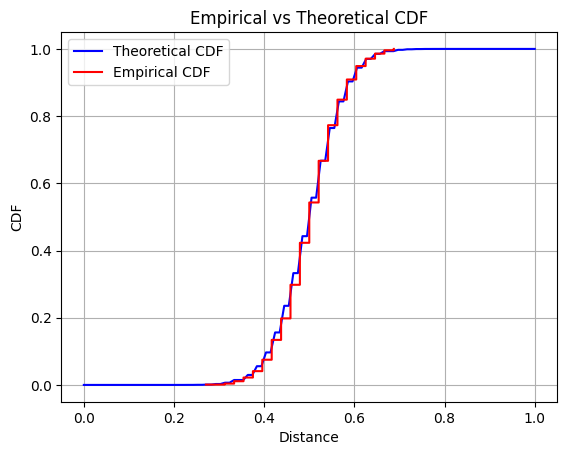

In [2]:
theoretical_cdf_values = theoretical_distance_cdf(
    None, np.linspace(0, 1, 100), "stable_sig"
)
distances = []
for _ in range(1000):
    distances.append(
        message_distance(
            generate_random_message("stable_sig"),
            GROUND_TRUTH_MESSAGES["stable_sig"],
            "identification",
        )
    )
emperical_distances, empirical_cdf_values = empirical_cdf(distances)

plt.plot(
    np.linspace(0, 1, 100),
    theoretical_cdf_values,
    label="Theoretical CDF",
    color="blue",
)
plt.step(
    emperical_distances,
    empirical_cdf_values,
    label="Empirical CDF",
    color="red",
    where="post",
)
plt.title("Empirical vs Theoretical CDF")
plt.xlabel("Distance")
plt.ylabel("CDF")
plt.legend()
plt.grid()
plt.show()

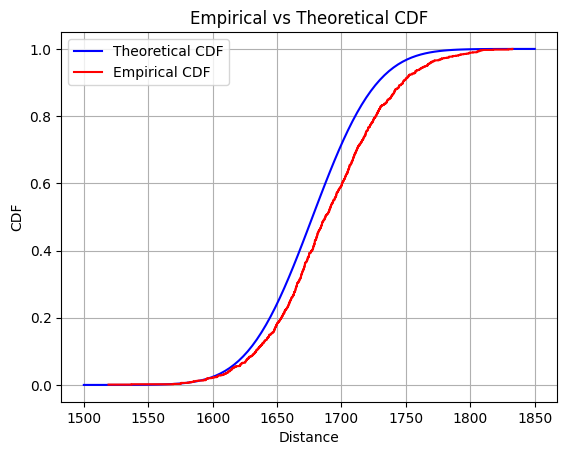

In [3]:
message = GROUND_TRUTH_MESSAGES["tree_ring"]
theoretical_cdf_values = theoretical_distance_cdf(
    [message] * 100,
    np.linspace(1500, 1850, 100),
    "tree_ring",
)
distances = []
for _ in range(1000):
    distances.append(
        message_distance(
            generate_random_message("tree_ring"), message, "identification"
        )
    )
emperical_distances, empirical_cdf_values = empirical_cdf(distances)

plt.plot(
    np.linspace(1500, 1850, 100),
    theoretical_cdf_values,
    label="Theoretical CDF",
    color="blue",
)
plt.step(
    emperical_distances,
    empirical_cdf_values,
    label="Empirical CDF",
    color="red",
    where="post",
)
plt.title("Empirical vs Theoretical CDF")
plt.xlabel("Distance")
plt.ylabel("CDF")
plt.legend()
plt.grid()
plt.show()

In [4]:
path = "/fs/nexus-projects/HuangWM/datasets/decoded/diffusiondb/distortion_single_rotation-3-stable_sig-decode.json"
num_users = 100
simulated_acc = simulated_identification_performance(
    get_messages_from_json(path, "stable_sig"), num_users, "stable_sig"
)
theoretical_acc = theoretical_identification_performance(
    get_messages_from_json(path, "stable_sig"), num_users, "stable_sig"
)
print("Simulated Acc: ", simulated_acc)
print("Theoretical Acc: ", theoretical_acc)

Simulated Acc:  (0.9984, 0.0)
Theoretical Acc:  0.9980861799426489


In [5]:
path = "/fs/nexus-projects/HuangWM/datasets/decoded/diffusiondb/distortion_single_rotation-3-tree_ring-decode.json"
num_users = 100
simulated_acc = simulated_identification_performance(
    get_messages_from_json(path, "tree_ring"), num_users, "tree_ring"
)
theoretical_acc = theoretical_identification_performance(
    get_messages_from_json(path, "tree_ring"), num_users, "tree_ring"
)
print("Simulated Acc: ", simulated_acc)
print("Theoretical Acc: ", theoretical_acc)

Simulated Acc:  (0.8278, 0.0)
Theoretical Acc:  0.842822197624481
